<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
#!conda install -y -c anaconda seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
import math
seaborn.set_context('talk')
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [3]:
#!pip install plotly --upgrade

In [4]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

In [5]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [6]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
melb_df.columns
melb_df.to_csv('melb_data.csv')

In [8]:
melb_df.groupby(['Type']).count()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Type,,,,,,,,,,,,,,,,,,,,
h,9449,9449,9449,9449,9449,9449,9449,9449,9449,9449,9449,9389,9449,4860,5408,8204,9449,9449,9449,9449
t,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,686,762,1045,1114,1114,1114,1114
u,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3015,3017,1584,2035,2962,3017,3017,3017,3017


In [9]:
melb_df.groupby(['Method']).count()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Method,,,,,,,,,,,,,,,,,,,,
PI,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1557,1564,870,995,1416,1564,1564,1564,1564
S,9022,9022,9022,9022,9022,9022,9022,9022,9022,9022,9022,8988,9022,4568,5271,8111,9022,9022,9022,9022
SA,92,92,92,92,92,92,92,92,92,92,92,91,92,44,50,81,92,92,92,92
SP,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1695,1703,1012,1136,1536,1703,1703,1703,1703
VB,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1187,1199,636,753,1067,1199,1199,1199,1199


In [10]:
melb_df.iloc[[6817]]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6817,Campbellfield,11 Bailey Ct,3,h,368000.0,SP,Iconek,3/12/2016,14.5,3061.0,...,1.0,2.0,600.0,NaN,NaN,Hume,-37.6783,144.9672,Northern Metropolitan,1889.0


In [11]:
melb_df.groupby(['Postcode']).count()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Postcode,,,,,,,,,,,,,,,,,,,,
3000.0,46,46,46,46,46,46,46,46,46,46,46,46,46,32,37,46,46,46,46,46
3002.0,22,22,22,22,22,22,22,22,22,22,22,22,22,8,8,22,22,22,22,22
3003.0,31,31,31,31,31,31,31,31,31,31,31,31,31,19,23,29,31,31,31,31
3006.0,41,41,41,41,41,41,41,41,41,41,41,41,41,26,34,41,41,41,41,41
3008.0,3,3,3,3,3,3,3,3,3,3,3,3,3,1,0,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
3810.0,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,3,3,3,3,3
3910.0,6,6,6,6,6,6,6,6,6,6,6,6,6,2,3,5,6,6,6,6


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


## Ejercicio 1: 

### Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [12]:

def generateStatDf(melb_df):
    
    rows = melb_df.shape[0]
    tmp = melb_df.isna().sum()

    df_isna_data = {'columns' :tmp.index.values , 'isnacount' : tmp.values }
    df_isna = pandas.DataFrame ( df_isna_data )
    df_isna['porc'] = df_isna.apply( lambda x : round( x['isnacount'] / rows , 2) * 100 ,axis=1) 
    return df_isna

melb_df_stats = generateStatDf(melb_df)
melb_df_stats

,columns,isnacount,porc
0,Suburb,0,0.0
1,Address,0,0.0
2,Rooms,0,0.0
3,Type,0,0.0
4,Price,0,0.0
5,Method,0,0.0
6,SellerG,0,0.0
7,Date,0,0.0
8,Distance,0,0.0
9,Postcode,0,0.0


Las columnas *BuildingArea* y *YearBuilt* tiene un faltante de datos significativos. Procedemos a eliminar las columnas. Dejamos la columna *CouncilArea* para hacer la imputación.

In [13]:
# Evitamos tirar un error en el caso de ejectuar varias veces esta celda
if ('BuildingArea' in melb_df.columns or 'YearBuilt' in melb_df.columns ):
    melb_df.drop(  columns=['BuildingArea','YearBuilt'],  axis = 'columns' , inplace=True)
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [14]:
def display_blox_plots(df, columns , displayGraph ,scale = False   ):

    row_idx = 0
    col_idx = 0 
    
    columns_count = len (columns)
    
    if (columns_count == 1):
        
        fig, axes = plt.subplots(1, 1 , figsize=(18, 10))
        displayGraph.display(df = df, column = columns[0] , ax_x =  axes )    
  
    elif (columns_count == 2):
        
        fig, axes = plt.subplots(1, 2 , figsize=(18, 10))
        for column in columns:
            displayGraph.display(df = df, column = column , ax_x = axes[col_idx] ) 
            col_idx = col_idx + 1
    else:
        # Se debe hacer de manera automatica el calculo de figsize
        fig, axes = plt.subplots(int(math.ceil(len(columns) / 2 )), 2 , figsize=(18, 8 * int(math.ceil(len(columns) / 2 ))))
        
        for column in columns:
            displayGraph.display(df = df, column = column , ax_x = axes[row_idx][col_idx] ) 
            col_idx = col_idx + 1
            if (col_idx == 2):
                col_idx = 0 
                row_idx = row_idx + 1     

In [15]:
class CustomPlot:
    scale = 1
    
    def setScale(self, scale):
        self.scale = scale
        
class CustomBoxPlot(CustomPlot):
   
    
    def __init__(self, scale = 1):
        print("Se corre el constructor")
        self.scale = scale
        
    def display(self, column , ax_x, df):
        
        column_max_value = df[column].max()
        if (self.scale == 1):
            seaborn.boxplot(ax = ax_x ,  data=df[column], orient='h')
        else:    
            seaborn.boxplot(ax = ax_x ,  data=df[column]/self.scale if self.scale and column_max_value > self.scale else df[column]  , orient='h')
        
        ax_x.set_title( f"{column} expresado en {self.scale}" if  self.scale > 1 and column_max_value > self.scale else column)


class CustomHistPlot(CustomPlot):
    
    def __init__(self, scale = 1):
        self.scale = scale
        
    def display(self, column, ax_x, df):
        column_max_value = df[column].max()
            
        if (self.scale == 1):
            seaborn.histplot(ax = ax_x , data =  df[column] ) 
        else:    
            seaborn.histplot(ax = ax_x , data= df[column]/self.scale if self.scale and column_max_value > self.scale else df[column]   ) 
         
        ax_x.set_title( f"{column} expresado en {self.scale}" if  self.scale > 1 and column_max_value > self.scale else column)
        

class CustomDistPlot(CustomPlot):
    
    def __init__(self ,plot):
        self.plot = plot 
        
    def display(self, column, ax_x, df):
        column_max_value = df[column].max()
            
        mean_value = df[column].mean()
        median_value = df[column].median()
        std_value = df[column].std()

        
        if (self.scale == 1):
            seaborn.distplot(a = df[column] ,ax = ax_x )
            
        else:    
            seaborn.distplot(a  = df[column]/self.scale if self.scale and column_max_value > self.scale else df[column]    ,ax = ax_x )
        
        self.plot.draw()
        
        ax_x.set_title( f"{column} expresado en {self.scale}" if  self.scale > 1 and column_max_value > self.scale else column)
        ax_x.axvline(mean_value, color='r', linestyle='-')
        ax_x.axvline(median_value, color='g', linestyle='-')
    

Se corre el constructor


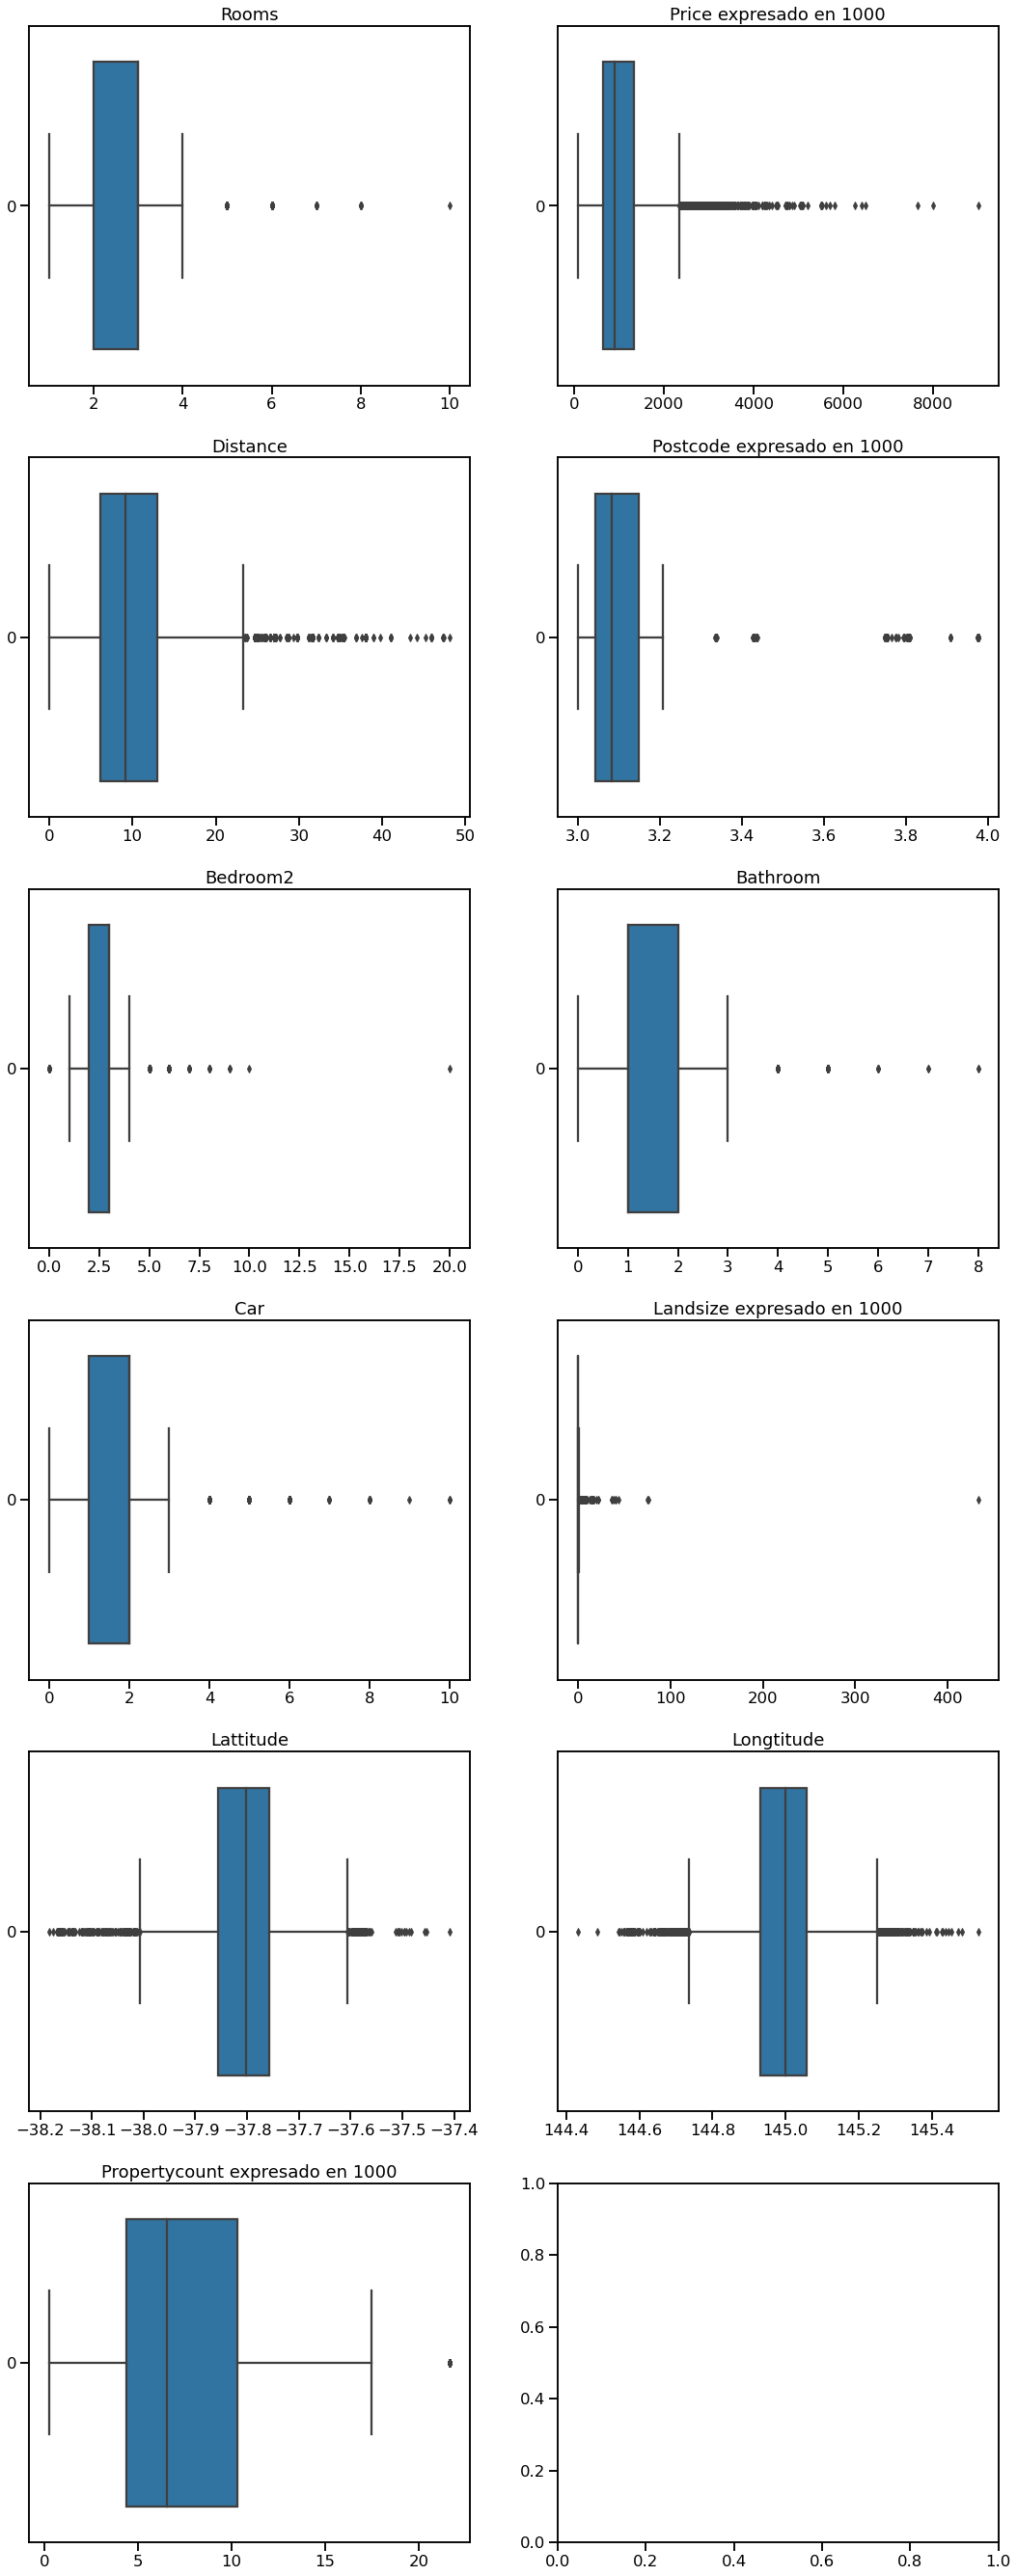

In [16]:
customBoxPlot = CustomBoxPlot(1000)

columns_to_plot = melb_df.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = melb_df , columns= columns_to_plot , displayGraph= customBoxPlot)

In [17]:
class IqrStrategy:
        
    def process(self, df, column):
    
        q_75 = df[column].quantile(0.75)
        q_25 = df[column].quantile(0.25)

        iqr = q_75 - q_25
        ul = q_75 + iqr * 1.5
        bl = q_25 - iqr * 1.5
        
        filtered = df[(df[column] >= bl) &  (df[column] <= ul) ] 
      
        return filtered

   
class UpperLowerStrategy:
    """This class removes from the dataframe, all the rows which column values are > ul and < bl
        
        Parameters:
        bl (float): Value between 0 and 1. Indicates the below limit
        ul (float): Value between 0 and 1. Indicates the uper limit
        
        
    """
    
    def __init__(self, bl, ul):
        self.bl_ = bl
        self.ul_ = ul
    
    def process(self, df, column):
        '''
        Removes outliers from df[column]
        
        Parameters:
            df (dataframe):Dataframe to be processed
            column (string): Name of the column to be cleaned

        Returns:
            filtered(Dataframe): A dataframe with the rows where the column column us between bl and ul  
        '''

    
        bl = df[column].quantile(self.bl_)
        ul  = df[column].quantile(self.ul_)

        filtered = df[(df[column] >= bl) &  (df[column] <= ul) ] 
        
        return filtered

    
def removeOutliers(df, strategy, columns):
    
    filtered = df
    for column in columns:
        filtered = strategy.process(filtered, column)

    return filtered    

Eliminamos los valores extremos de las variables numéricas indicadas en *delete_outlayiers_columns*

In [18]:
strategy = IqrStrategy()
#strategy = UpperLowerStrategy(0.001,0.999)
delete_outlayiers_columns = ['Price', 'Car' , 'Rooms', 'Bathroom' , 'Bedroom2' , 'Landsize']
filtered_melb_df = removeOutliers(melb_df, strategy , delete_outlayiers_columns )

Agrupamos por diferentes criterios al data frame que le eliminamos los outliers

In [19]:
#filtered_df.groupby(['Regionname']).count()
filtered_melb_df.groupby(by = ['Suburb']).agg({'Price' : ['sum','mean' , 'median' , 'count'] }).sort_values(by=[('Price' , 'mean')],ascending = False)[:]

Price                               
                      sum          mean     median count
Suburb                                                  
Princes Hill    8673000.0  1.734600e+06  1700000.0     5
Deepdene        1680000.0  1.680000e+06  1680000.0     1
Albert Park    85378500.0  1.641894e+06  1745000.0    52
Ashburton      79901500.0  1.598030e+06  1650000.0    50
Kew East       58755000.0  1.587973e+06  1650000.0    37
...                   ...           ...        ...   ...
Melton South    6512250.0  3.830735e+05   395000.0    17
Wallan           366000.0  3.660000e+05   366000.0     1
Kurunjang       1412000.0  3.530000e+05   353500.0     4
Rockbank         340000.0  3.400000e+05   340000.0     1
Bacchus Marsh    285000.0  2.850000e+05   285000.0     1

[306 rows x 4 columns]

In [20]:
filtered_melb_df.groupby(by = ['SellerG']).agg({'Price' : ['sum','mean' , 'median' , 'count'] }).sort_values(by=[('Price' , 'count')],ascending = False)[:20]

Price                               
                        sum          mean     median count
SellerG                                                   
Nelson         1.379491e+09  9.762850e+05   918000.0  1413
Jellis         1.258688e+09  1.182977e+06  1200000.0  1064
hockingstuart  9.202891e+08  8.943529e+05   800000.0  1029
Barry          7.478002e+08  8.336680e+05   761000.0   897
Ray            5.234882e+08  8.498185e+05   790550.0   616
Buxton         6.176029e+08  1.137390e+06  1100000.0   543
Marshall       6.017096e+08  1.415787e+06  1475000.0   425
Biggin         3.159455e+08  9.632485e+05   910500.0   328
Brad           2.457237e+08  7.978042e+05   770000.0   308
Woodards       2.539303e+08  9.997257e+05   975000.0   254
Fletchers      3.022887e+08  1.199558e+06  1133000.0   252
Jas            1.940856e+08  8.626027e+05   860000.0   225
Greg           2.115575e+08  1.057788e+06   938750.0   200
McGrath        1.970992e+08  1.021240e+06   950000.0   193
Sweeney        1.452298e+08  7.936054e+05   757500.0   183
Noel           1.952557e+08  1.115747e+06  1000000.0   175
Miles          1.625164e+08  9.616354e+05   890000.0   169
Gary           1.383321e+08  9.161066e+05   795000.0   151
Harcourts      1.111280e+08  7.664000e+05   663500.0   145
RT             1.544930e+08  1.119514e+06   999000.0   138

In [21]:
filtered_melb_df.groupby(by = ['SellerG' ,'Suburb']).agg({'Price' : ['mean' , 'median' , 'count'] }).sort_values(by=[('Price' , 'count')],ascending = False)[:20]

Price                 
                                      mean     median count
SellerG       Suburb                                       
Nelson        Essendon        1.045053e+06   996500.0    94
              Brunswick       1.064750e+06  1020500.0    92
Biggin        Richmond        1.043170e+06  1089000.0    88
Barry         Reservoir       6.787896e+05   666500.0    82
Buxton        Bentleigh East  1.078210e+06  1050000.0    81
Nelson        Preston         8.671014e+05   910000.0    69
              Coburg          9.244030e+05   951000.0    67
              Reservoir       7.199552e+05   725000.0    67
Ray           Reservoir       6.212778e+05   622500.0    63
Jellis        Brunswick       1.031181e+06  1002500.0    58
              Richmond        1.116112e+06  1119000.0    58
              Hawthorn        1.122948e+06  1027500.0    58
Nelson        Keilor East     8.056368e+05   823000.0    57
hockingstuart Bentleigh East  1.051580e+06  1040000.0    55
Jas           Yarraville      9.357056e+05   903750.0    54
Nelson        Northcote       1.074708e+06  1050000.0    53
              Pascoe Vale     8.145000e+05   783500.0    52
Brad          Pascoe Vale     7.381569e+05   775000.0    51
hockingstuart South Yarra     6.750700e+05   558750.0    50
Nelson        Ascot Vale      1.027847e+06   995000.0    49

In [22]:
filtered_melb_df[filtered_melb_df['SellerG'] == 'Biggin'].groupby(by = ['Suburb']).agg({'Price' : ['mean' , 'median' , 'count'] }).sort_values(by=[('Price' , 'count')],ascending = False)[:20]


Price                 
                         mean     median count
Suburb                                        
Richmond         1.043170e+06  1089000.0    88
Maidstone        7.569821e+05   730250.0    28
Elsternwick      1.446740e+06  1460000.0    25
Maribyrnong      8.069348e+05   905000.0    23
Abbotsford       1.041639e+06  1032500.0    18
Cremorne         1.073000e+06  1110000.0    13
Prahran          9.240417e+05   760000.0    12
West Footscray   8.544000e+05   883000.0    10
South Yarra      7.491250e+05   670500.0     8
Windsor          9.871429e+05   865000.0     7
Footscray        6.150000e+05   485000.0     7
Caulfield South  1.215333e+06  1197500.0     6
Port Melbourne   1.082667e+06  1090000.0     6
Elwood           6.519000e+05   655000.0     5
Brighton         1.375400e+06  1296000.0     5
Kensington       9.014000e+05   811000.0     5
Seddon           1.059375e+06  1050000.0     4
Brighton East    1.581667e+06  1445000.0     3
Gardenvale       4.760000e+05   440000.0     3
Braybrook        6.850000e+05   645000.0     3

In [23]:
#Y esto porque quedo?
#filtered_df.shape[0]/ 306

In [24]:
filtered_melb_df.shape

(11524, 19)

Se corre el constructor


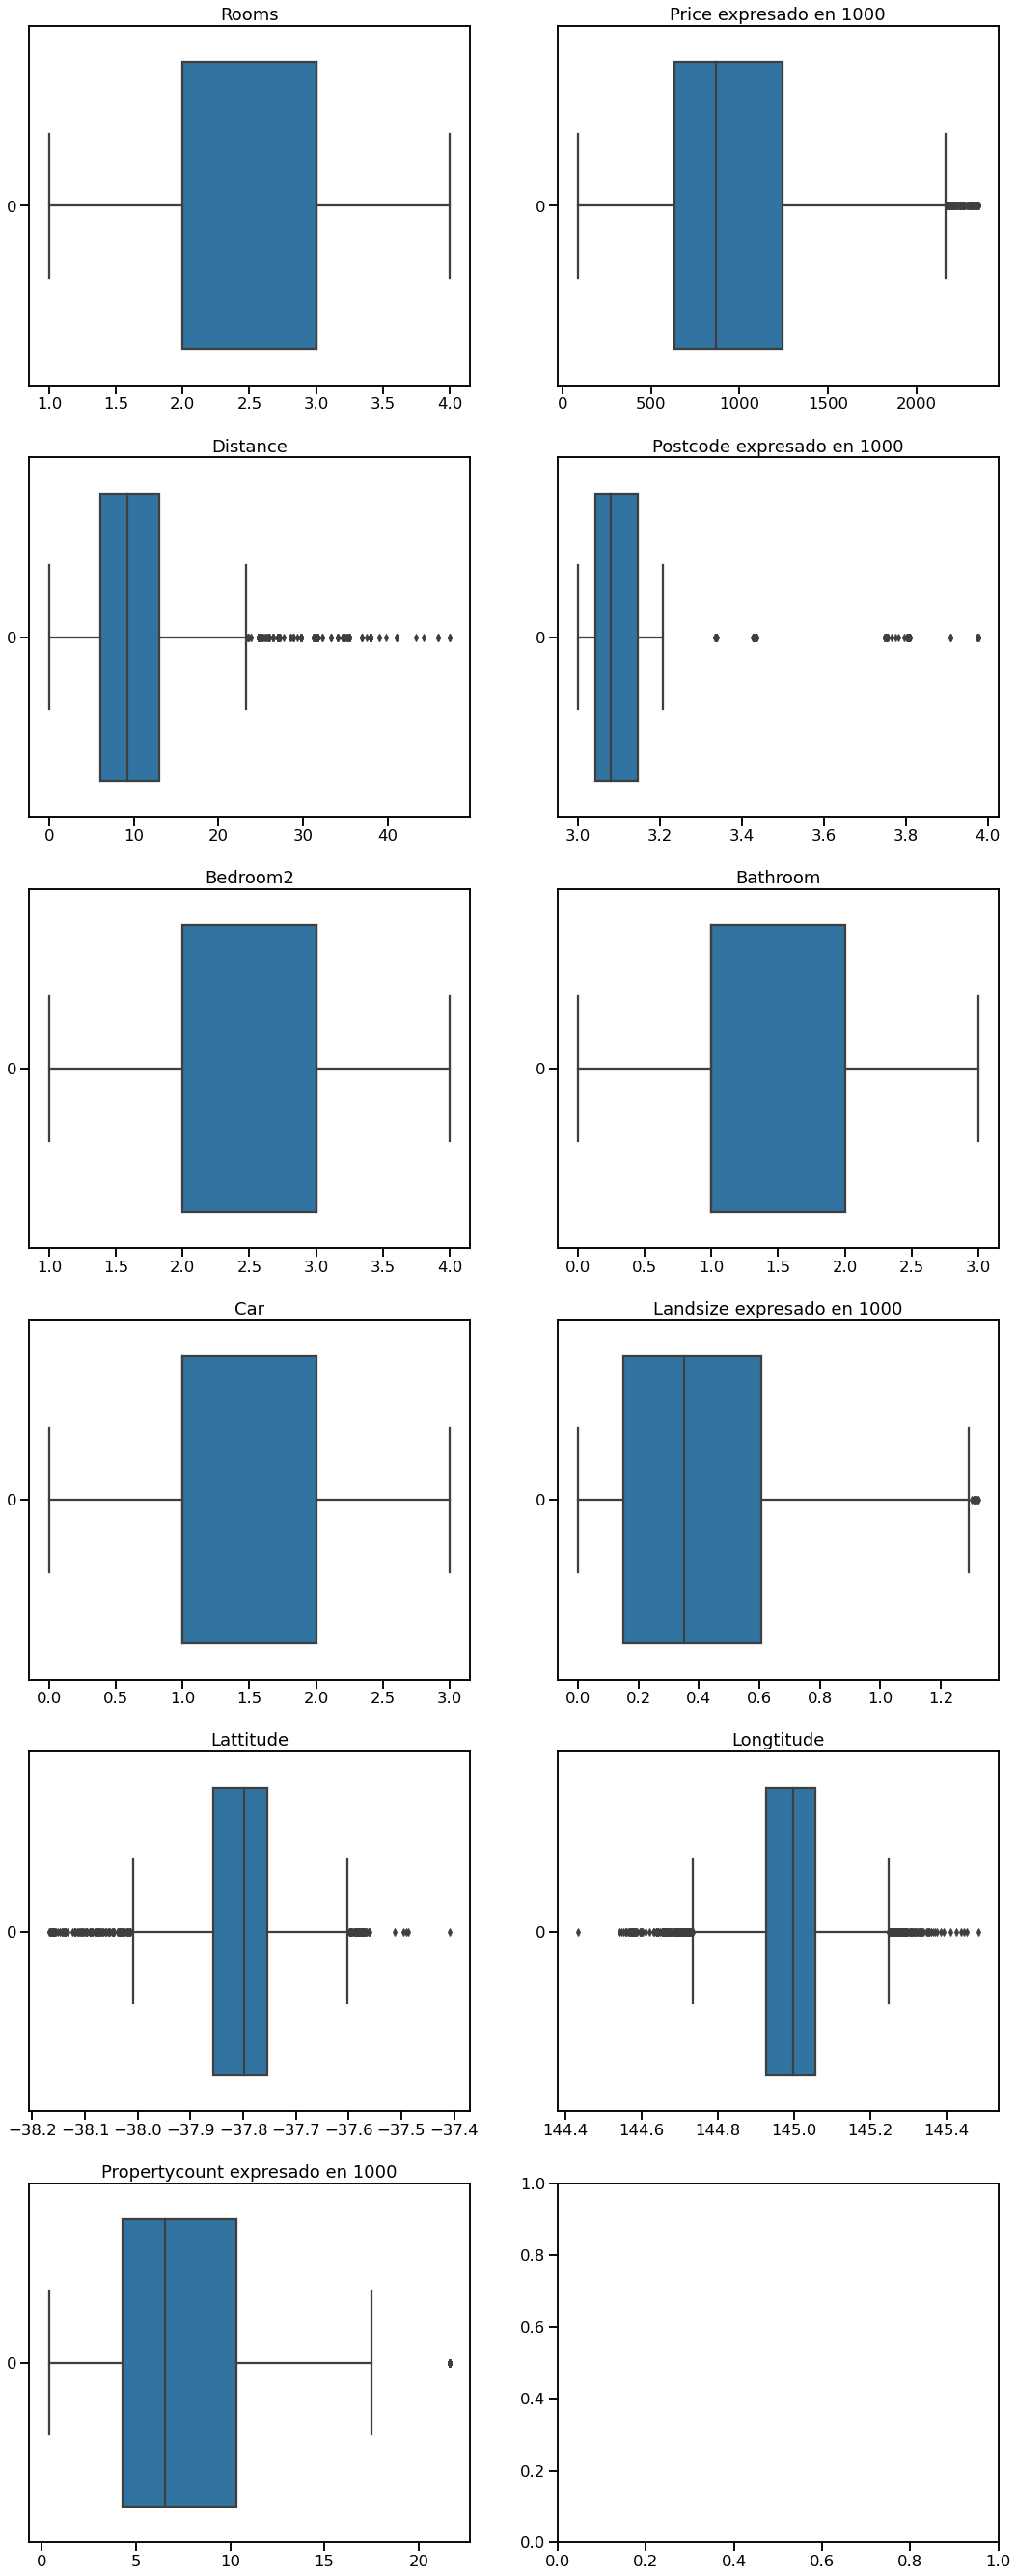

In [25]:
customBoxPlot = CustomBoxPlot(1000)
columns_to_plot = filtered_melb_df.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = filtered_melb_df , columns= columns_to_plot , displayGraph= customBoxPlot)

In [26]:
filtered_rows = filtered_melb_df.shape[0] - filtered_melb_df.shape[0]


print (f"Cantidad de filas de DF original: {melb_df.shape[0]}")
print (f"Cantidad de filas de DF sin outliers: {filtered_melb_df.shape[0]}")
print (f"Cantidad de filas eliminadas: {filtered_rows}")
print (f"Porcentaje filas eliminadas: % {round(filtered_rows/melb_df.shape[0],2)* 100}")

Cantidad de filas de DF original: 13580
Cantidad de filas de DF sin outliers: 11524
Cantidad de filas eliminadas: 0
Porcentaje filas eliminadas: % 0.0


Se debe contemplar que ademas de remover los outliers, también se removieron dos columnas las cuales tenían un gran faltante de datos. Las columnas eliminadas fueron: *BuildingArea* y *YearBuilt* 

### Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad

Vemos la correlación entre variables numéricas

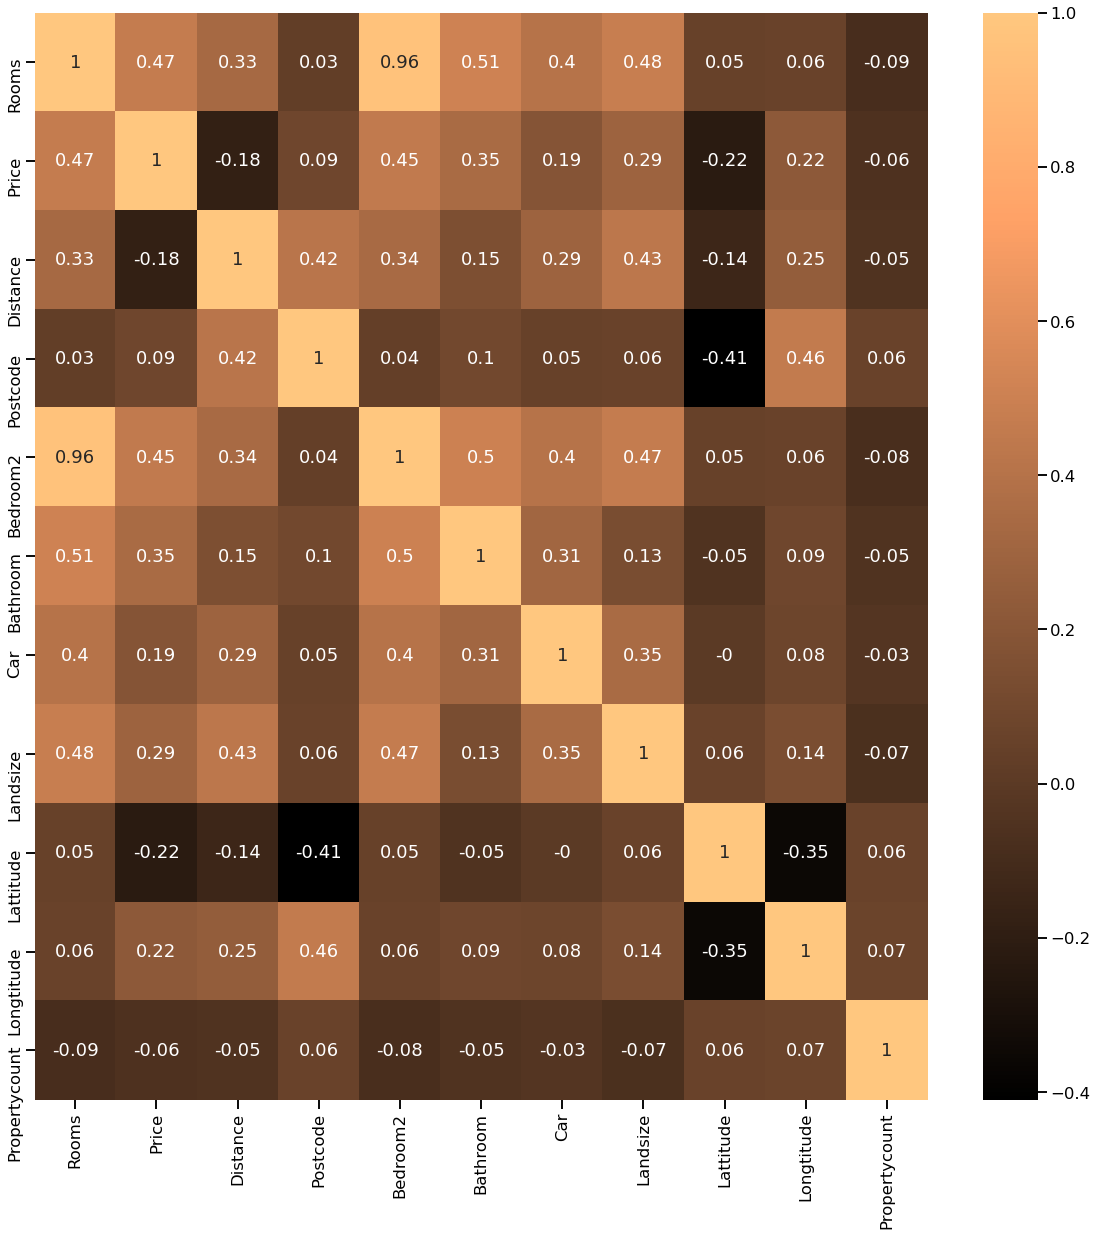

In [27]:
correlations = filtered_melb_df.corr().round(2)

#Using Pearson Correlation
plt.figure(figsize=(20,20))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.copper)
plt.show()

Vemos la distribución de las variables numéricas

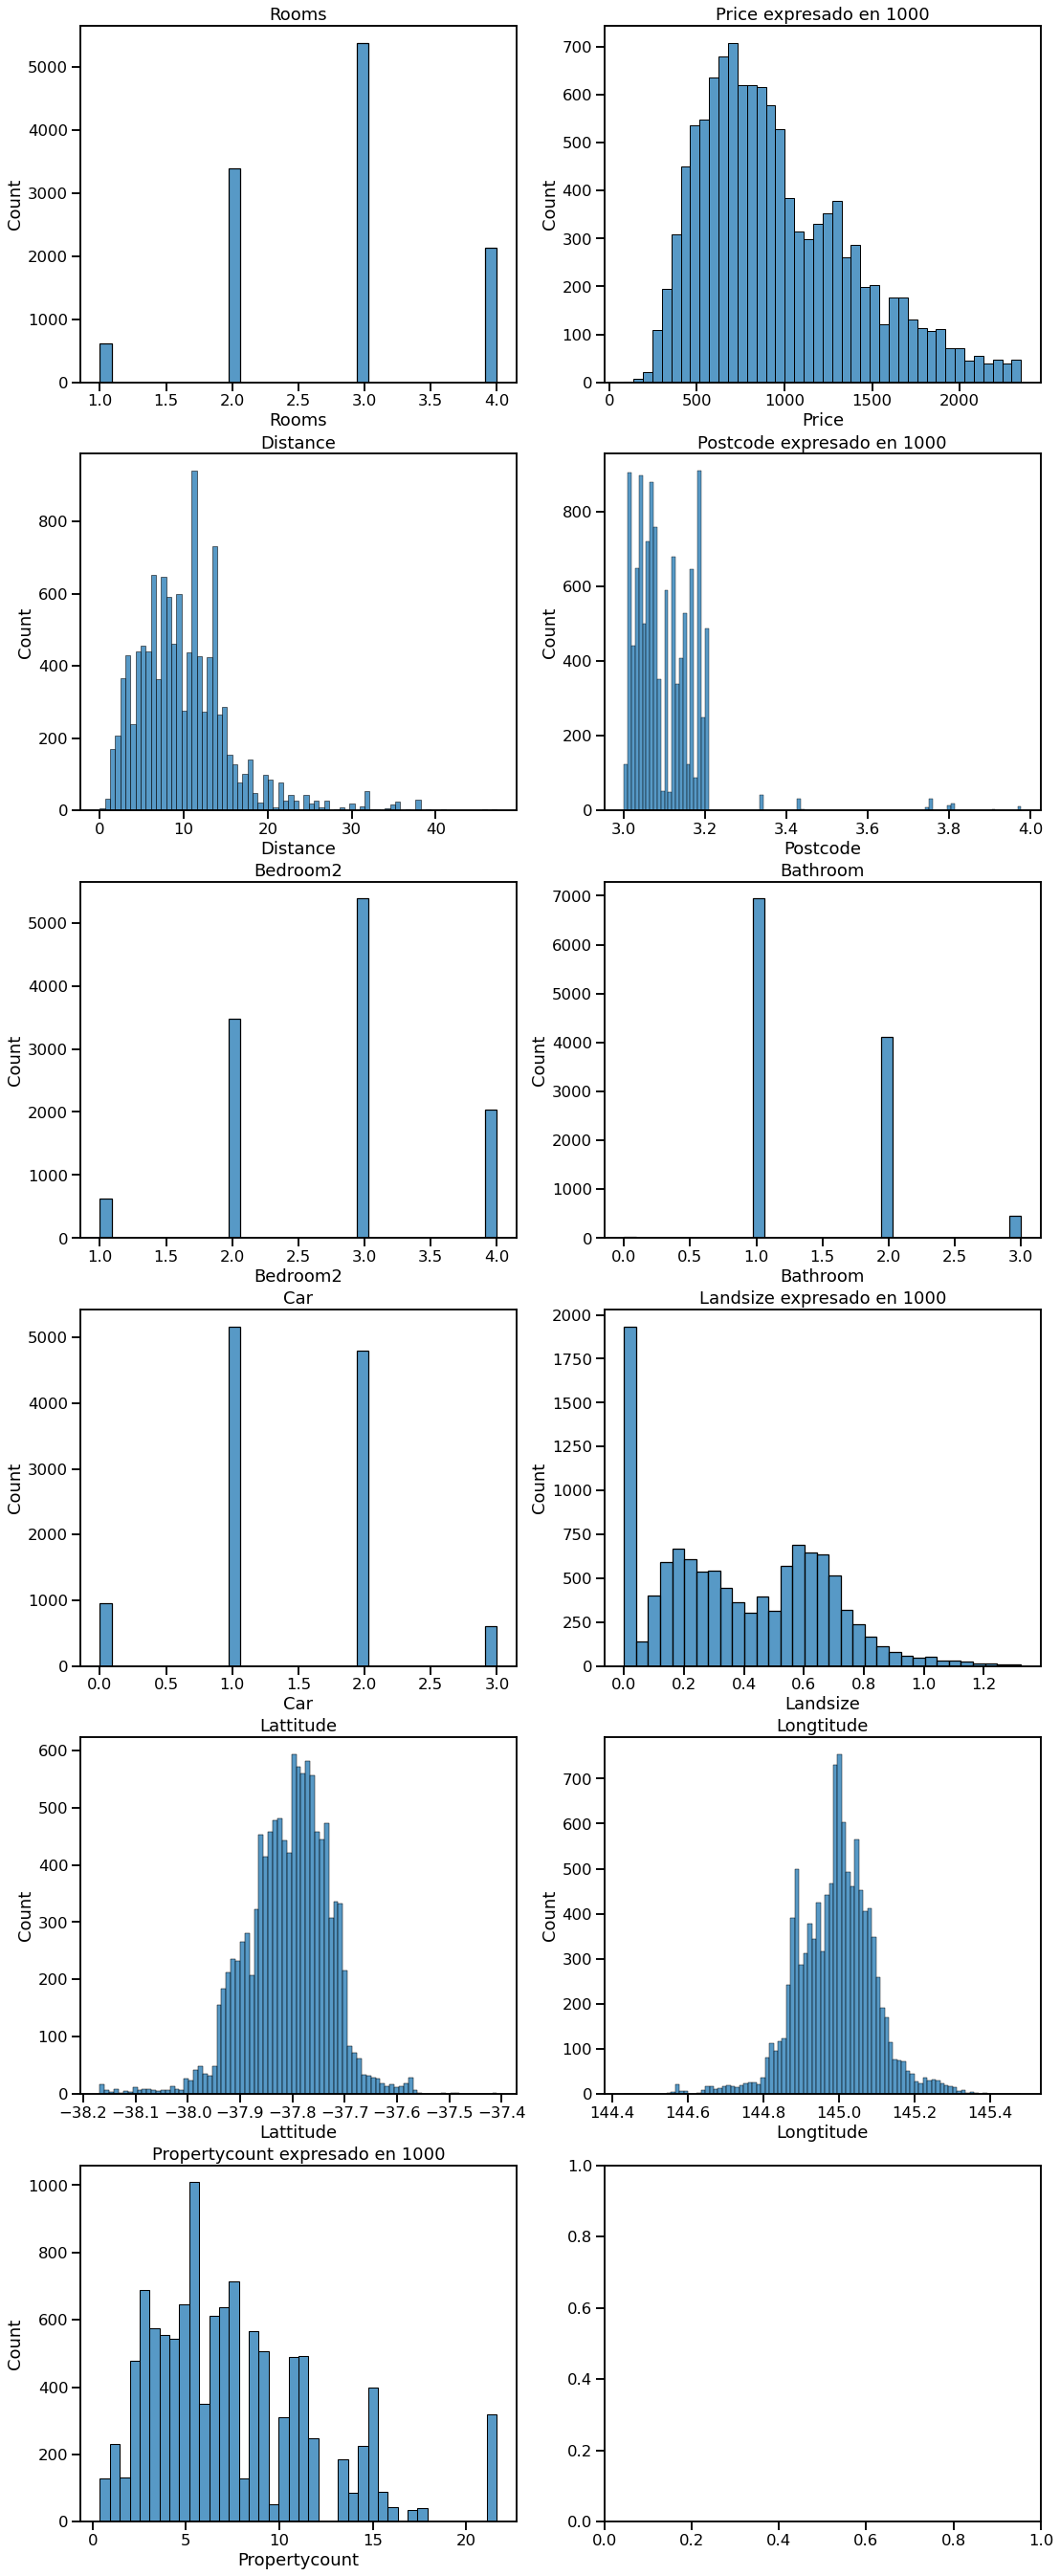

In [28]:
customHistPlot = CustomHistPlot(1000)

columns_to_plot = filtered_melb_df.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = filtered_melb_df , columns= columns_to_plot , displayGraph= customHistPlot)

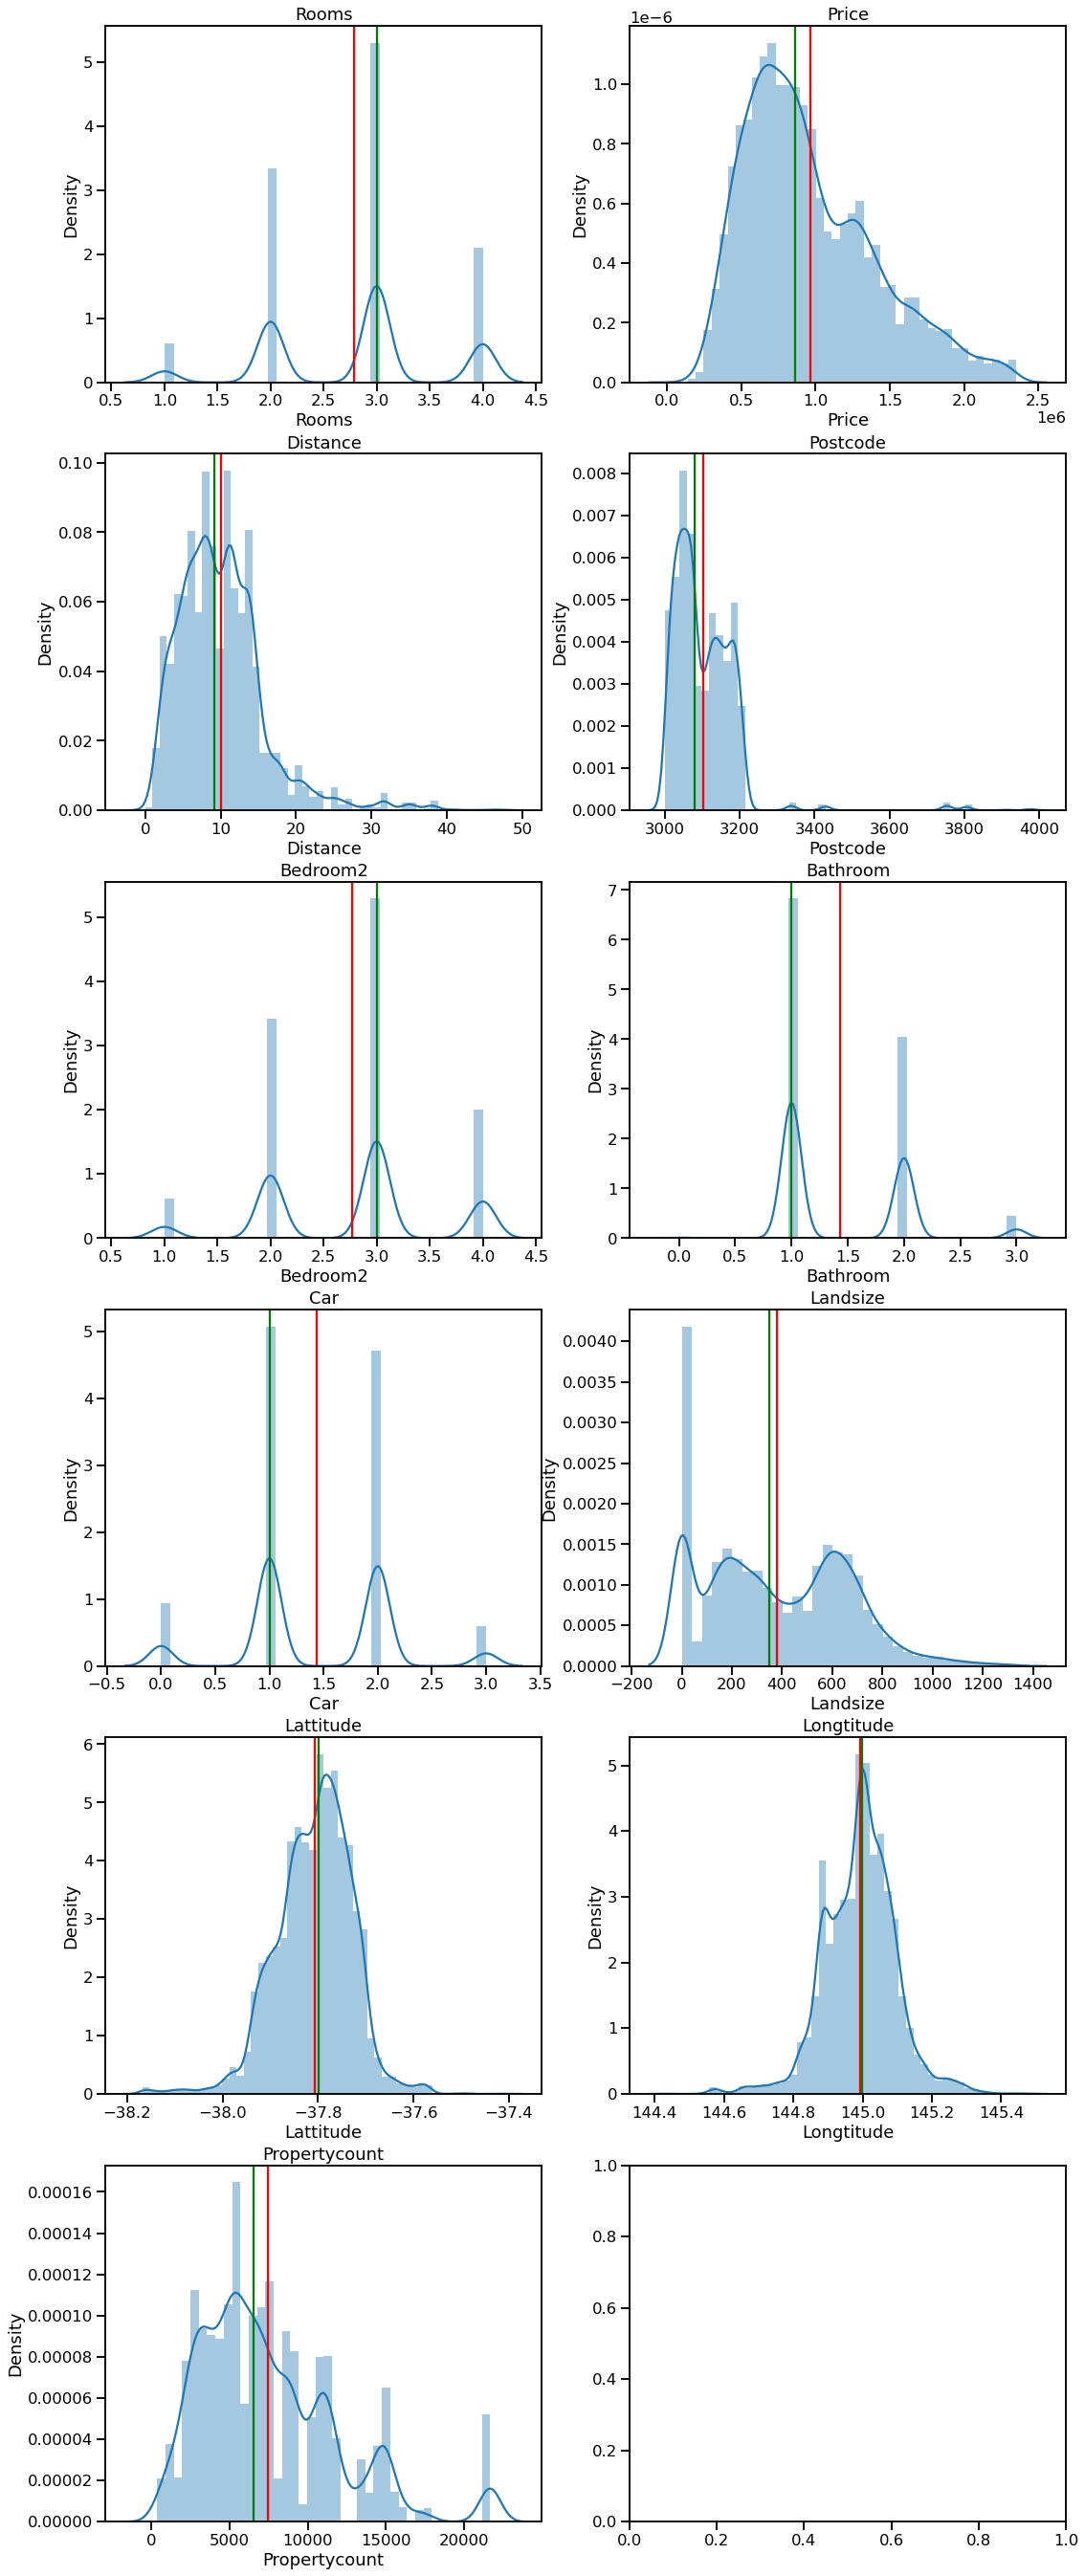

In [29]:
customDistPlot = CustomDistPlot(plt)
customDistPlot.setScale(1)
columns_to_plot = filtered_melb_df.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = filtered_melb_df , columns= columns_to_plot , displayGraph= customDistPlot)

# Se debe completar que columnas elegimos y porque

In [30]:
filtered_melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [31]:
selected_columns = ['Suburb', 'Rooms', 'Type', 'Price',
       'Date', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       ]

filtered_melb_df = filtered_melb_df[selected_columns]
# 'Address', 'Method' , SellerG', 'Distance' , Propertycount

### Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 

1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

Seleccionamos que columnas de airbnb vamos a recuperar

In [32]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

In [33]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


In [34]:
airbnb_df.dtypes

description               object
neighborhood_overview     object
street                    object
neighborhood              object
city                      object
suburb                    object
state                     object
zipcode                   object
latitude                 float64
longitude                float64
price                      int64
weekly_price             float64
monthly_price            float64
dtype: object

In [35]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

Antes de unir los conjuntos de datos, tenemos que asegurarnos de que tengamos suficientes registros en común como para agregar información relevantes.

In [36]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


In [37]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df.Postcode.isin(intersection).sum() / len(melb_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      airbnb_df.zipcode.isin(intersection).sum() / len(airbnb_df))

Records in Sales df with corresponding zipcode form Airbnb df 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df 0.9302904564315353


In [38]:
relevant_cols = ['price']

In [39]:
airbnb_df[relevant_cols + ['zipcode']]\
  .groupby('zipcode').mean().reset_index()[:5]

,zipcode,price
0,2010.0,40.000000
1,2134.0,50.000000
2,2582.0,104.000000
3,3000.0,150.504307
4,3001.0,132.500000


De las columnas recuperadas del data set de airbnb, nos quedamos con las columnas indicadas en *relevant_cols*

In [40]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)

In [41]:
airbnb_price_by_zipcode[:3]

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.0,1,NaN,NaN
1,2134.0,50.0,1,NaN,NaN
2,2582.0,104.0,1,NaN,NaN


In [42]:
airbnb_price_by_zipcode.describe()

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
count,247.000000,247.000000,247.000000,184.000000,168.000000
mean,3508.538462,149.900412,92.101215,756.381199,2804.327037
std,1903.914390,84.872988,261.914701,393.460560,1642.559997
min,2010.000000,37.000000,1.000000,133.000000,527.000000
25%,3072.500000,93.744681,8.500000,463.721429,1645.783333
50%,3148.000000,126.012987,27.000000,667.900000,2359.000000
75%,3589.500000,187.168478,73.000000,994.500000,3450.363636
max,30122.000000,759.083333,3367.000000,2236.666667,10060.000000


Hacemos el merge entre  melb y airbnb

In [43]:
merged_sales_df = filtered_melb_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df

,Suburb,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,4/03/2017,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,3,h,850000.0,4/03/2017,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,4,h,1600000.0,4/06/2016,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,Werribee,4,h,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,NaN,-37.89327,144.64789,Western Metropolitan,3030.0,115.748062,258.0,590.000000,2224.600000
11520,Westmeadows,3,h,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,NaN,-37.67917,144.89390,Northern Metropolitan,3049.0,92.285714,21.0,400.000000,NaN
11521,Wheelers Hill,4,h,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,3150.0,124.026455,189.0,526.350000,1901.611111
11522,Williamstown,3,h,1031000.0,26/08/2017,3016.0,3.0,2.0,2.0,333.0,NaN,-37.85927,144.87904,Western Metropolitan,3016.0,191.094595,74.0,612.250000,2119.750000


In [44]:
merged_sales_df.shape

(11524, 19)

In [45]:
merged_sales_df[:5]

,Suburb,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,4/03/2017,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,3,h,850000.0,4/03/2017,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,4,h,1600000.0,4/06/2016,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258


In [46]:
merged_sales_df.describe()

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
count,11524.000000,1.152400e+04,11524.000000,11524.000000,11524.000000,11524.000000,11524.000000,11524.000000,11524.000000,11513.000000,11513.000000,11513.000000,10788.000000,10443.000000
mean,2.784016,9.629166e+05,3102.784103,2.766227,1.431968,1.437782,380.979695,-37.807526,144.992301,3102.651611,129.336857,160.664466,697.522603,2575.116915
std,0.804257,4.420174e+05,89.228209,0.800515,0.572722,0.719811,280.221938,0.078802,0.103018,88.859697,62.100654,279.244873,332.438326,1407.740162
min,1.000000,8.500000e+04,3000.000000,1.000000,0.000000,0.000000,0.000000,-38.168020,144.431810,3000.000000,40.000000,1.000000,160.000000,600.000000
25%,2.000000,6.300000e+05,3044.000000,2.000000,1.000000,1.000000,150.000000,-37.856100,144.926182,3044.000000,94.205128,42.000000,469.866667,1567.500000
50%,3.000000,8.650000e+05,3081.000000,3.000000,1.000000,1.000000,350.000000,-37.798800,144.997700,3081.000000,114.142857,72.000000,609.750000,2291.500000
75%,3.000000,1.245000e+06,3147.000000,3.000000,2.000000,2.000000,607.000000,-37.754045,145.054700,3147.000000,147.453731,176.000000,896.055556,3366.666667
max,4.000000,2.350000e+06,3977.000000,4.000000,3.000000,3.000000,1324.000000,-37.408530,145.482730,3977.000000,759.083333,3367.000000,2236.666667,10060.000000


In [47]:
merged_sales_stats = generateStatDf(merged_sales_df)
merged_sales_stats

,columns,isnacount,porc
0,Suburb,0,0.0
1,Rooms,0,0.0
2,Type,0,0.0
3,Price,0,0.0
4,Date,0,0.0
5,Postcode,0,0.0
6,Bedroom2,0,0.0
7,Bathroom,0,0.0
8,Car,0,0.0
9,Landsize,0,0.0


Notar que existen 11 *zipcodes* con valor NAN. Esto se debe a que hay columnas de melb_filtered que tiene códigos postales *Postcode* que no aparecen en el data frame de arbnb. Si fuera un inner join lo que se hace, esto no pasaría, pero perderíamos esas filas.

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

In [48]:
airbnb_df.groupby(by = ['zipcode'])

In [49]:
airbnb_df[airbnb_df['zipcode'] == 3105]['suburb']

0                 Bulleen
5056            Melbourne
7852              Bulleen
8561              Bulleen
8945              Bulleen
9010              Bulleen
9011              Bulleen
9013              Bulleen
9067              Bulleen
9069              Bulleen
9070              Bulleen
9094              Bulleen
9782              Bulleen
9966              Bulleen
11943             Bulleen
12219             Bulleen
15440    South Kingsville
16118             Bulleen
18975             Bulleen
19117             Bulleen
19323             Bulleen
19392             Bulleen
20263             Bulleen
Name: suburb, dtype: object

In [50]:
filtered_melb_df[filtered_melb_df['Postcode'] == 3057]['Suburb']

6762     Brunswick East
6763     Brunswick East
6764     Brunswick East
6765     Brunswick East
6766     Brunswick East
              ...      
12921    Brunswick East
13128    Brunswick East
13129    Brunswick East
13373    Brunswick East
13374    Brunswick East
Name: Suburb, Length: 84, dtype: object

Se observa en el dataset de airbnb que para el mismo zipcode, en alguna ocaciones, no todos los valores suburb son iguales. Por cada zipcode de arbnb, se devolverá el suburb que más veces aparezca. Para ello se filtran todas las filas que tienen el misom zipcode. De las filas filtradas, se obtiene el valor suburb que mas se repite y se retorna. En el caso que el zipcode que se busca, no esta en el df de airbnb, se devuelve como suburb, *NOT_VALID*. Se debería ver luego se las filas que quedan con *NOT_VALID* son descartadas.

In [51]:
def getSuburb(zipcode, df):

    """Returns a dictoriary entry zipcode, suburb. df data frame is filtered by zipcode. The rows filtered are grouped by suburb. The suburb with higest count is returned
    
    Parameters:
    
    zipcode: Number value representing the zip code
    df: Airbnb data frame or any dafa frame with at least the following columns 'zipcode', 'price' , 'suburb'
    
    Returns:
    dictionary entry: {zicode, suburb}
    """

    result = None
    try:
        suburb = df[df['zipcode'] == zipcode].groupby(by = ['suburb']).agg({'price' : ['count'] }).sort_values(by=[('price' , 'count')],ascending = False)
        result = {zipcode: suburb.index[0]}
        
    except Exception as e:
        result = {zipcode: "NOT_VALID"}
        
    return result
    
#getSuburb(zipcode = 3057.0 , df = airbnb_df )

def generateZipcodesSuburbDict(zipcodes, df):
   
    """Returns a dictionary of zipcodes, suburb.
    
    """
    result_dict = {}
    
    for zipcode in zipcodes:
        r = getSuburb( zipcode, df )
        result_dict.update(r)

    return result_dict

In [52]:
getSuburb(zipcode = 3057.0 , df = airbnb_df )

{3057.0: 'Brunswick East'}

In [53]:
# Se obtienen los zipcodes de las filas donde CouncilArea es iguala a NAN
zipcodes = merged_sales_df[merged_sales_df['CouncilArea'].isna()]['Postcode'].unique()

In [54]:
#Se buscan los Suburb que esten asociados a los zipcodes obtenidos anteriormente
zipcodes_dict = generateZipcodesSuburbDict(zipcodes , df = airbnb_df)

In [55]:
zipcodes_dict[3057.0]

'Brunswick East'

In [56]:
filtered_df_stats = generateStatDf(merged_sales_df)
filtered_df_stats

,columns,isnacount,porc
0,Suburb,0,0.0
1,Rooms,0,0.0
2,Type,0,0.0
3,Price,0,0.0
4,Date,0,0.0
5,Postcode,0,0.0
6,Bedroom2,0,0.0
7,Bathroom,0,0.0
8,Car,0,0.0
9,Landsize,0,0.0


In [57]:
def updateCouncilArea(x, zipcodes_dict):
    
    if  type (x['CouncilArea']) is float:
        
        suburb   = zipcodes_dict[x["Postcode"]]
        return suburb   
    
    else:
        return x['CouncilArea']        
       
  
new_filterd_df = merged_sales_df.apply( func=updateCouncilArea   , axis = 1, zipcodes_dict =zipcodes_dict )

merged_sales_df['CouncilArea'] = new_filterd_df

merged_sales_df

,Suburb,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,4/03/2017,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,3,h,850000.0,4/03/2017,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,4,h,1600000.0,4/06/2016,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,Werribee,4,h,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,Point Cook,-37.89327,144.64789,Western Metropolitan,3030.0,115.748062,258.0,590.000000,2224.600000
11520,Westmeadows,3,h,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,Westmeadows,-37.67917,144.89390,Northern Metropolitan,3049.0,92.285714,21.0,400.000000,NaN
11521,Wheelers Hill,4,h,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,Glen Waverley,-37.90562,145.16761,South-Eastern Metropolitan,3150.0,124.026455,189.0,526.350000,1901.611111
11522,Williamstown,3,h,1031000.0,26/08/2017,3016.0,3.0,2.0,2.0,333.0,Williamstown,-37.85927,144.87904,Western Metropolitan,3016.0,191.094595,74.0,612.250000,2119.750000


2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.
# Falta esto se debe usar KNN u OTRO

In [58]:
filtered_df_stats = generateStatDf(merged_sales_df)
filtered_df_stats

,columns,isnacount,porc
0,Suburb,0,0.0
1,Rooms,0,0.0
2,Type,0,0.0
3,Price,0,0.0
4,Date,0,0.0
5,Postcode,0,0.0
6,Bedroom2,0,0.0
7,Bathroom,0,0.0
8,Car,0,0.0
9,Landsize,0,0.0


Notar que hay 11 filas que tiene zipcode como NAN

In [59]:
merged_sales_df[merged_sales_df['zipcode'].isna()]

,Suburb,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
5918,Campbellfield,3,h,368000.0,3/12/2016,3061.0,3.0,1.0,2.0,600.0,Hume,-37.67830,144.96720,Northern Metropolitan,NaN,NaN,NaN,NaN,NaN
5919,Campbellfield,3,h,455000.0,3/12/2016,3061.0,3.0,1.0,1.0,766.0,Hume,-37.68040,144.96640,Northern Metropolitan,NaN,NaN,NaN,NaN,NaN
7555,Campbellfield,3,h,445000.0,20/05/2017,3061.0,3.0,1.0,2.0,534.0,Hume,-37.67410,144.96980,Northern Metropolitan,NaN,NaN,NaN,NaN,NaN
7638,Gisborne,4,h,521000.0,1/07/2017,3437.0,4.0,2.0,2.0,978.0,Macedon Ranges,-37.49642,144.60119,Northern Victoria,NaN,NaN,NaN,NaN,NaN
8255,Gisborne,3,h,540000.0,17/06/2017,3437.0,3.0,1.0,2.0,665.0,Macedon Ranges,-37.48701,144.58567,Northern Victoria,NaN,NaN,NaN,NaN,NaN
9093,Bacchus Marsh,3,h,285000.0,8/07/2017,3340.0,3.0,1.0,2.0,612.0,Moorabool,-37.67344,144.43181,Western Victoria,NaN,NaN,NaN,NaN,NaN
9758,Gisborne,3,h,426000.0,15/07/2017,3437.0,3.0,1.0,1.0,412.0,Macedon Ranges,-37.49175,144.59565,Northern Victoria,NaN,NaN,NaN,NaN,NaN
9931,Ardeer,3,h,645000.0,22/07/2017,3022.0,3.0,1.0,1.0,603.0,Brimbank,-37.78104,144.80357,Western Metropolitan,NaN,NaN,NaN,NaN,NaN
10197,Ardeer,3,h,627000.0,29/07/2017,3022.0,3.0,1.0,2.0,697.0,Brimbank,-37.77713,144.79746,Western Metropolitan,NaN,NaN,NaN,NaN,NaN
10976,Wallan,3,h,366000.0,16/09/2017,3756.0,3.0,1.0,1.0,502.0,NOT_VALID,-37.40853,144.97749,Northern Victoria,NaN,NaN,NaN,NaN,NaN


In [60]:
merged_sales_df[merged_sales_df['CouncilArea'] == 'NOT_VALID']

,Suburb,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
10976,Wallan,3,h,366000.0,16/09/2017,3756.0,3.0,1.0,1.0,502.0,NOT_VALID,-37.40853,144.97749,Northern Victoria,NaN,NaN,NaN,NaN,NaN
10996,Ardeer,3,h,730000.0,19/08/2017,3022.0,3.0,2.0,2.0,739.0,NOT_VALID,-37.77245,144.80010,Western Metropolitan,NaN,NaN,NaN,NaN,NaN


## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [61]:
merged_sales_df.to_csv('merged_sales.csv')